#### 딥러닝 모델을 구축할 때의 주요 어려움
- 대량의 학습 데이터 수집
- 계산 리소스 확보와 계산 시간
- 모델의 튜닝과 시행착오 비용

## 사전 학습 모델(Pre-trained model)
- 사전에 어떤 과제에서 가중치가 학습된 딥러닝 모델
- 활용 방법
    - 그대로 사용하는 방법
    - 일부를 재학습해서 사용하는 방법

### 학습시키지 않고 그대로 사용

In [1]:
# 사전 학습 모델의 호출
# VGG16 모델 불러오기
from tensorflow.python.keras.applications.vgg16 import VGG16

model = VGG16()

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 635s 1us/step


In [2]:
# 모델 요약 확인

# 입력층의 크기는 224*224, 출력층의 크기는 1000
# 출력층의 크기 : 이미지 1장의 입력에 대해서 몇 개의 값을 출력하는지 나타낸다
# 즉 출력층의 크기가 1000이라는 점은 이미지 1장의 입력에 대해 1000개의 값을 출력한다는 것
# VGG16은 이미지 1장의 입력에 대해서 1000 클래스에 대해 각각의 분류 확률을 출력한다
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [4]:
# 입력 이미지 확인
from tensorflow.python.keras.preprocessing.image import load_img

# 이미지 불러오기
# load_img()에서는 불러올 때 이미지를 리사이즈할 수 있으므로
# VGG16의 입력 사이즈인 224*224로 리사이즈한다
img_dog = load_img('img/dog.jpg', target_size = (224, 224))
img_cat = load_img('img/cat.jpg', target_size = (224, 224))

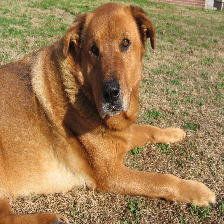

In [5]:
img_dog

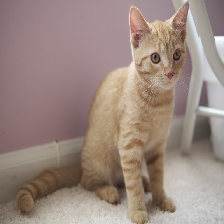

In [6]:
img_cat

In [ ]:
# load_img()로 읽어들인 이미지는
# Pillow라고 부르는 이미지 라이브러리의 데이터 형식으로 되어있기 때문에
# 그대로는 모델에 입력할 수 없다

# 모델에 입력할 때는
# 이미지를 일반적인 수치 데이터로 표현해야 하므로
# img_to_array 함수를 사용해서 numpy.ndarray로 변환

# 그리고 VGG에 입력하기에 적당한 값으로 변환하기 위해
# preprocess_input 함수 적용
# preprocess_input() : 입력값으로부터 학습할 때의 이미지의 평균값을 빼서 
#                      평균을 0으로 변환하는 중심화 처리와
#                      컬러 채널의 순서를 변경(RGB → BGR)하는 처리를 진행

In [7]:
# 입력 데이터를 VGG16이 학습할 때의 데이터와 같은 형태로 변환하기 위한 전처리

# 일반적인 수치 데이터로 변환
from tensorflow.python.keras.preprocessing.image import img_to_array

# load_img()는 Pillow라고 부르는 이미지 라이브러리의 데이터 형식이므로 그대로는 이용할 수 없다
# 일반적인 수치 데이터로 취급하기 위해 numpy.ndarray로 변환
arr_dog = img_to_array( img_dog )
arr_cat = img_to_array( img_cat )

In [9]:
# VGG16에 입력하기 위해 전처리 적용
from tensorflow.python.keras.applications.vgg16 import preprocess_input

# 이미지 각 채널의 중심화와 RGB로부터 BGR로 변환
# 이미지를 VGG16 모델이 학습할 때와 같은 형태로 맞춰서 변환
arr_dog = preprocess_input( arr_dog )
arr_cat = preprocess_input( arr_cat )

In [11]:
# 일괄로 입력하기 위해서
# 2장의 이미지를 하나의 배열로 만든 입력 데이터 작성

# 2장의 이미지를 하나로 합친다
import numpy as np

# 일반적인 판별 모델은 여러 장의 이미지/데이터를 한 번에 입력해서
# 데이터의 수만큼 결과를 출력할 수 있다
# 개와 고양이의 이미지를 합쳐서, 두 장의 이미지를 포함하는 배열로 입력 데이터를 변환
arr_input = np.stack([arr_dog, arr_cat])

In [13]:
# 입력 데이터의 shape을 확인
print('shape of arr_input : ', arr_input.shape)

shape of arr_input :  (2, 224, 224, 3)


In [15]:
# 예측 결과 산출

# 예측값(확률)을 산출
# 2개의 이미지를 입력으로 전달했기 때문에 2x1000의 2차원 배열이 출력된다
probs = model.predict( arr_input )

# 예측값의 shape를 확인
print('shape of probs : ', probs.shape)

# 예측값 표시
probs

shape of probs :  (2, 1000)


array([[1.3260053e-06, 2.6298670e-07, 1.9136249e-07, ..., 3.4285901e-07,
        4.2921824e-06, 4.3677963e-05],
       [6.1585985e-07, 6.2430754e-06, 2.1850478e-06, ..., 6.7036285e-07,
        1.7082145e-04, 7.0913536e-03]], dtype=float32)

In [16]:
# 이미지 예측 결과 취득

from tensorflow.python.keras.applications.vgg16 import decode_predictions

# 예측 결과는 1000 클래스 각각의 확률만 반환하기 때문에
# 클래스 이름을 판단하기 어려우므로
# decode_predictions()을 사용해서 알기 쉬운 결과로 변환, 상위 5개를 표시
results = decode_predictions(probs)

40960/35363 [==================================] - 0s 2us/step


In [17]:
results

[[('n02087394', 'Rhodesian_ridgeback', 0.5825015),
  ('n02090379', 'redbone', 0.13647164),
  ('n02099601', 'golden_retriever', 0.05809517),
  ('n02088466', 'bloodhound', 0.05578338),
  ('n02106662', 'German_shepherd', 0.039084647)],
 [('n02123159', 'tiger_cat', 0.29868475),
  ('n02124075', 'Egyptian_cat', 0.25323772),
  ('n02123045', 'tabby', 0.16191177),
  ('n02127052', 'lynx', 0.060164604),
  ('n04265275', 'space_heater', 0.024290923)]]

In [18]:
# 개 이미지의 결과를 표시(상위 5개)
results[0]

[('n02087394', 'Rhodesian_ridgeback', 0.5825015),
 ('n02090379', 'redbone', 0.13647164),
 ('n02099601', 'golden_retriever', 0.05809517),
 ('n02088466', 'bloodhound', 0.05578338),
 ('n02106662', 'German_shepherd', 0.039084647)]

In [19]:
# 고양이 이미지의 결과를 표시(상위 5개)
results[1]

[('n02123159', 'tiger_cat', 0.29868475),
 ('n02124075', 'Egyptian_cat', 0.25323772),
 ('n02123045', 'tabby', 0.16191177),
 ('n02127052', 'lynx', 0.060164604),
 ('n04265275', 'space_heater', 0.024290923)]

### 사전 학습 모델의 일부를 재학습(전이학습, Transfer Learning)
- 1000 클래스에 포함되지 않는 이미지를 분류하고 싶을 때
- 사전 학습 모델을 이용해서 다른 클래스에 적용하는 것

In [20]:
# 주피터 노트북에서 그래프 표시
%matplotlib inline

In [21]:
# 모델의 요약 확인
from tensorflow.python.keras.applications.vgg16 import VGG16

# 기존의 1000 클래스의 출력을 사용하지 않기 때문에
# include_top = False로 출력층을 포함하지 않는 상태로 불러들인다
vgg16 = VGG16(include_top=False, input_shape=(224, 224, 3))

# 모델의 요약 확인, 출력층이 포함되지 않은 것을 알 수 있다
vgg16.summary()

58892288/58889256 [==============================] - 46s 1us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_poo

In [23]:
# 호출한 VGG16 모델의 편집을 쉽게 하기 위해서
# VGG16 모델로부터 Sequential 모델을 생성

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten

# 모델을 편집해서 네트워크를 생성할 함수 정의
def build_transfer_model(vgg16) :
    
    # 호출한 모델을 사용해서 새로운 모델 작성
    model = Sequential(vgg16.layers)
    
    # 호출한 가중치의 일부는 재학습하지 않도록 설정
    # 여기서는 추가한 층과 출력층에 가까운 층의 가중치만 재학습
    for layer in model.layers[:15] :
        layer.trainable = False
    
    # 추가할 출력 부분의 층을 구축
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    
    return model

# 정의한 함수를 호출해서 네트워크를 생성
model = build_transfer_model(vgg16)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
# 네트워크 정의가 완료되면
# 최적화 알고리즘 등을 지정해서 모델 컴파일

from tensorflow.python.keras.optimizers import SGD

model.compile(
    loss = 'binary_crossentropy',
    # 기존의 VGG16 가중치를 활용하면서
    # 현재의 문제에도 가중치를 적용시키기 위해서
    # 최적화의 학습률을 낮게(1e-4) 설정
    # 한 번에 가중치를 크게 수정하지 않는 것이 포인트
    optimizer = SGD(lr = 1e-4, momentum = 0.9),
    metrics = ['accuracy']
)

# 모델 요약 확인
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [26]:
# 생성기 생성
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.applications.vgg16 import preprocess_input

# 학습용 이미지를 읽어들이기 위한 생성기 생성,
# 스케일 변환과 데이터 확장의 인수를 지정
idg_train = ImageDataGenerator(
    rescale = 1/255.,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    preprocessing_function = preprocess_input
)

In [27]:
# 생성기를 사용해서
# 실제로 데이터(이미지)를 읽어 들이기 위한 iterator 생성
# 학습용, 검증용

# 훈련용 데이터
img_itr_train = idg_train.flow_from_directory(
    'img/shrine_temple/train',
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'binary'
)

# 검증용 데이터
img_itr_validation = idg_train.flow_from_directory(
    'img/shrine_temple/validation',
    target_size = (224, 224),
    batch_size = 16,
    class_mode = 'binary'
)

Found 600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [31]:
# 모델 학습

# 1. 모델 저장용 폴더 생성
import os
from datetime import datetime

# 모델 저장용 폴더 준비
model_dir = os.path.join('models', 
                         datetime.now().strftime('%y%m%d_%H%M'))
os.makedirs(model_dir, exist_ok = True)
# 저장할 폴더 이름 표시
print('model_dir : ', model_dir)

dir_weights = os.path.join(model_dir, 'weights')
os.makedirs(dir_weights, exist_ok = True)

model_dir :  models\190926_1908


In [34]:
# 2. 작성한 폴더에 네트워크 구조와 학습할 때의 클래스 레이블 저장
# (네트워크 구조와 클래스 레이블의 저장)
import json
import pickle

# 네트워크 저장
model_json = os.path.join(model_dir, 'model.json')
with open(model_json, 'w') as f :
    json.dump(model.to_json(), f)
    
# 학습할 때의 정답 레이블 저장
model_classes = os.path.join(model_dir, 'classes.pkl')
with open(model_classes, 'wb') as f :
    pickle.dump(img_itr_train.class_indices, f)

In [35]:
# 3. 학습할 때 지정해야 할 값을 사전에 계산
import math

# 미니 배치를 몇 개 학습하면 1에폭이 되는지 계산
# (학습할 때 지정할 필요가 있다)
batch_size = 16
steps_per_epoch = math.ceil(
    img_itr_train.samples/batch_size
)
validation_steps = math.ceil(
    img_itr_validation.samples/batch_size
)

In [37]:
# 4. 콜백을 생성하고 설정

# 모델의 가중치와 손실을 정기적으로(에폭 단위로) 저장하기 위해
# 콜백(Callbacks) 이용

from tensorflow.python.keras.callbacks import ModelCheckpoint, CSVLogger

# 콜백의 설정
cp_filepath = os.path.join(dir_weights, 'ep{epoch: 02d}_ls_{loss:.1f}.h5')


# ModelCheckpoint를 사용해서 가중치를 5에폭마다 저장
cp = ModelCheckpoint(
    cp_filepath,
    monitor = 'loss',
    verbose = 0,
    save_best_only = False,
    save_weights_only = True,
    mode = 'auto',
    period = 5
)

csv_filepath = os.path.join(model_dir, 'loss.csv')
# CSVLogger를 사용해서 손실을 CSV 형식으로 출력하도록 설정
csv = CSVLogger(csv_filepath, append = True)

In [38]:
# 5. 모델 학습

n_epoch = 30

history = model.fit_generator(
    img_itr_train,
    steps_per_epoch = steps_per_epoch,
    # 학습할 에폭 수
    epochs = n_epoch,
    validation_data = img_itr_validation,
    validation_steps = validation_steps,
    callbacks = [cp, csv]
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
38/38 [==============================] - 1340s 35s/step - loss: 0.6454 - acc: 0.6350 - val_loss: 0.4421 - val_acc: 0.8800
Epoch 2/30
38/38 [==============================] - 1342s 35s/step - loss: 0.4739 - acc: 0.7917 - val_loss: 0.3569 - val_acc: 0.8500
Epoch 3/30
38/38 [==============================] - 1336s 35s/step - loss: 0.3763 - acc: 0.8350 - val_loss: 0.2871 - val_acc: 0.8900
Epoch 4/30
38/38 [==============================] - 1329s 35s/step - loss: 0.3441 - acc: 0.8517 - val_loss: 0.2587 - val_acc: 0.9050
Epoch 5/30
38/38 [==============================] - 1333s 35s/step - loss: 0.3219 - acc: 0.8717 - val_loss: 0.2283 - val_acc: 0.9150
Epoch 6/30
38/38 [==============================] - 1477s 39s/step - loss: 0.2961 - acc: 0.8783 - val_loss: 0.2124 - val_acc: 0.9450
Epoch 7/30
32/38 [========================>.....] - ETA: 1:41 - loss: 0.3026 - acc: 0.8810

KeyboardInterrupt: 

In [ ]:
# 학습한 모델을 사용해서 예측

from utils import load_random_imgs

# 학습 결과를 산출(추론)
# test_data_dir = 'img/shrine_temple/test/unknown' 

